<a href="https://colab.research.google.com/github/babymlin/MLP_MNIST_Complex/blob/main/MLP_MNIST_complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-addons
import tensorflow as tf
from tensorflow import keras

     |████████████████████████████████| 686kB 29.3MB/s 


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


數字： 0


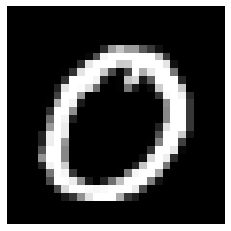

In [4]:
import matplotlib.pyplot as plt
import random
num = random.randint(0, 60000-1)
print("數字：",y_train[num])
plt.axis("off")
plt.imshow(X_train[num], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(X_train[num])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,43,154,195,155,155,89,56,17,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,8,82,244,254,254,254,254,254,254,192,56,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,46,230,254,254,254,202,205,254,254,254,254,228,17,0,0,0,0,0,0
8,0,0,0,0,0,0,0,2,50,228,254,254,202,76,7,69,254,174,233,254,254,119,1,0,0,0,0,0
9,0,0,0,0,0,0,0,50,254,254,254,243,42,0,2,197,214,27,96,254,254,254,39,0,0,0,0,0


In [6]:
# Tensorflow預設初始權重所搭配的輸入範圍是0到1或-1到+1，因此輸入資料需要限制在這個範圍。
X_train_norm = X_train.reshape(60000, 784)/255.
X_test_norm = X_test.reshape(10000, 784)/255.

In [7]:
#!pip install tensorflow-addons
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Softmax, Flatten, LeakyReLU
layers = [
  Dense(units=256, input_dim=28*28), #784*128+128=100,480
  LeakyReLU(0.01),
  Dense(units=10), # 128*10+10=1,290
  Softmax(axis=-1) #設定在這裡，Softmax會再取1次Log
]
model = Sequential(layers)
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)
sgd = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=ranger, loss="SparseCategoricalCrossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
  EarlyStopping(patience=5, restore_best_weights=True),
  ModelCheckpoint("mlp.h5", save_best_only=True)
]

In [9]:
model.fit(X_train_norm, y_train, 
  batch_size=64,
  epochs=20,
  validation_split=0.1,
  #validation_data=(X_test, y_test),
  verbose=2,
  callbacks=callbacks)

Epoch 1/20
844/844 - 6s - loss: 0.6731 - accuracy: 0.8229 - val_loss: 0.2346 - val_accuracy: 0.9365
Epoch 2/20
844/844 - 3s - loss: 0.2400 - accuracy: 0.9332 - val_loss: 0.1605 - val_accuracy: 0.9568
Epoch 3/20
844/844 - 3s - loss: 0.1684 - accuracy: 0.9527 - val_loss: 0.1206 - val_accuracy: 0.9693
Epoch 4/20
844/844 - 3s - loss: 0.1249 - accuracy: 0.9643 - val_loss: 0.1000 - val_accuracy: 0.9717
Epoch 5/20
844/844 - 3s - loss: 0.0964 - accuracy: 0.9728 - val_loss: 0.0852 - val_accuracy: 0.9773
Epoch 6/20
844/844 - 3s - loss: 0.0766 - accuracy: 0.9781 - val_loss: 0.0811 - val_accuracy: 0.9770
Epoch 7/20
844/844 - 3s - loss: 0.0606 - accuracy: 0.9829 - val_loss: 0.0811 - val_accuracy: 0.9757
Epoch 8/20
844/844 - 3s - loss: 0.0497 - accuracy: 0.9861 - val_loss: 0.0746 - val_accuracy: 0.9785
Epoch 9/20
844/844 - 3s - loss: 0.0408 - accuracy: 0.9893 - val_loss: 0.0674 - val_accuracy: 0.9805
Epoch 10/20
844/844 - 3s - loss: 0.0328 - accuracy: 0.9915 - val_loss: 0.0730 - val_accuracy: 0.9788

In [10]:
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9793


[0.06702817231416702, 0.9793000221252441]

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test_norm)
mat = confusion_matrix(y_test, y_pred)
pd.DataFrame(mat,
      index = [f"True:{i}" for i in range(10)],
      columns = [f"Pre:{i}" for i in range(10)],      
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Pre:0,Pre:1,Pre:2,Pre:3,Pre:4,Pre:5,Pre:6,Pre:7,Pre:8,Pre:9
True:0,970,0,1,2,0,0,2,2,2,1
True:1,0,1123,3,1,0,1,2,1,4,0
True:2,4,1,1010,1,1,0,2,7,5,1
True:3,1,0,3,998,0,2,0,3,3,0
True:4,1,0,2,1,955,0,5,4,2,12
True:5,2,0,0,9,1,865,6,2,4,3
True:6,5,2,1,1,2,4,940,0,3,0
True:7,0,2,9,4,1,0,0,1005,2,5
True:8,7,0,4,5,3,3,2,5,943,2
True:9,1,3,0,4,6,3,1,4,3,984


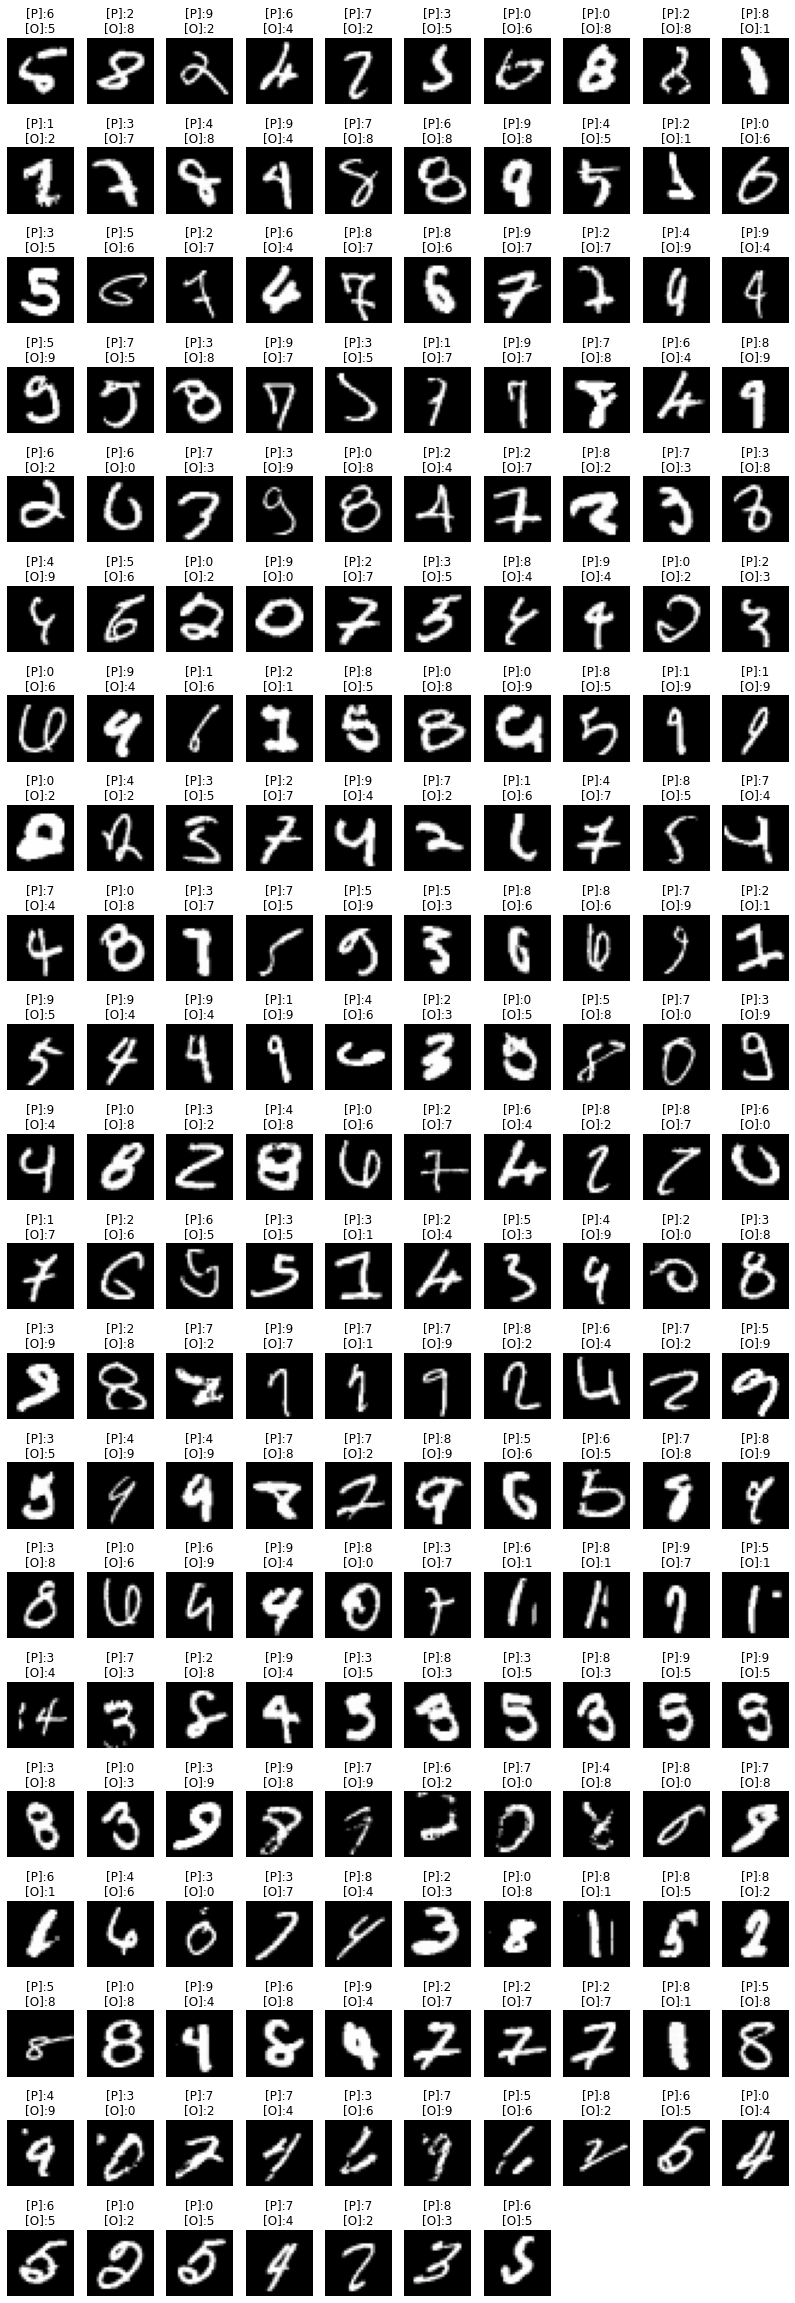

In [13]:
import numpy as np
idx = np.nonzero(y_pred!=y_test)[0]
false_pre = y_pred[idx]
false_label = y_test[idx]
false_img = X_test[idx]

plt.figure(figsize=(14,42))
width = 10
height = len(idx)//width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = f"[P]:{false_pre[i]}\n[O]:{false_label[i]}"
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i], cmap="gray")